In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sunset.jpg', 0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
print(np.transpose(hist))

[[5.3000e+01 1.8800e+02 8.1300e+02 1.8680e+03 2.8060e+03 3.4440e+03
  4.1750e+03 5.4100e+03 6.1290e+03 6.3040e+03 6.1490e+03 6.5160e+03
  6.8890e+03 7.7000e+03 7.0450e+03 7.0530e+03 7.5560e+03 9.8380e+03
  1.1473e+04 1.2341e+04 1.4290e+04 1.6874e+04 1.8385e+04 1.8816e+04
  1.8553e+04 1.9003e+04 1.9074e+04 1.7820e+04 1.7108e+04 1.6458e+04
  1.6212e+04 1.6937e+04 1.6482e+04 1.6738e+04 1.6788e+04 1.6929e+04
  1.6795e+04 1.6926e+04 1.7075e+04 1.7059e+04 1.7031e+04 1.6589e+04
  1.6129e+04 1.6084e+04 1.6177e+04 1.5939e+04 1.6090e+04 1.6453e+04
  1.6627e+04 1.6781e+04 1.6843e+04 1.7068e+04 1.7106e+04 1.7093e+04
  1.6995e+04 1.6850e+04 1.6651e+04 1.6580e+04 1.6270e+04 1.6079e+04
  1.5608e+04 1.5289e+04 1.4970e+04 1.5005e+04 1.4765e+04 1.4567e+04
  1.4448e+04 1.4477e+04 1.4483e+04 1.4354e+04 1.3875e+04 1.4051e+04
  1.4002e+04 1.3444e+04 1.3490e+04 1.3330e+04 1.3101e+04 1.2733e+04
  1.2781e+04 1.2323e+04 1.2342e+04 1.2199e+04 1.1870e+04 1.1757e+04
  1.1685e+04 1.1643e+04 1.1405e+04 1.1299e+04 1.

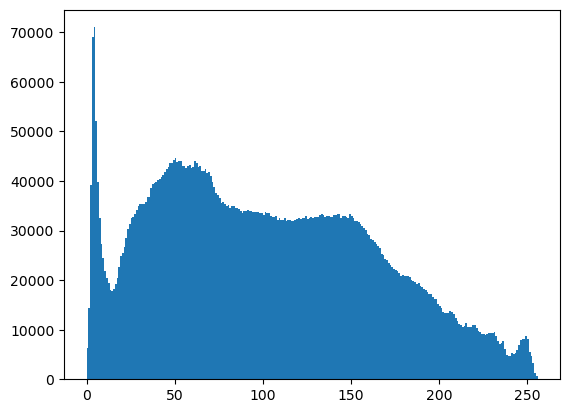

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sunset.jpg')
hist = np.bincount(img.ravel(),minlength=256)
plt.hist(img.ravel(),256,[0,256]); plt.show()

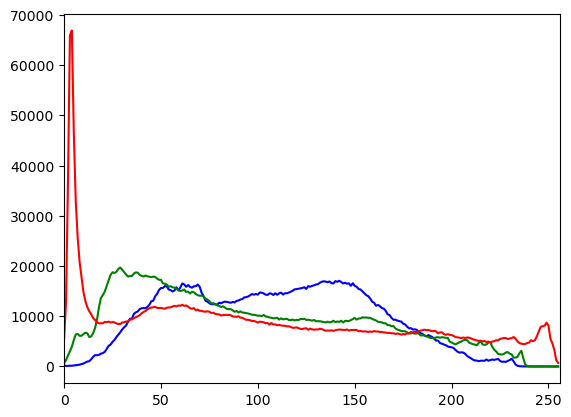

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sunset.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

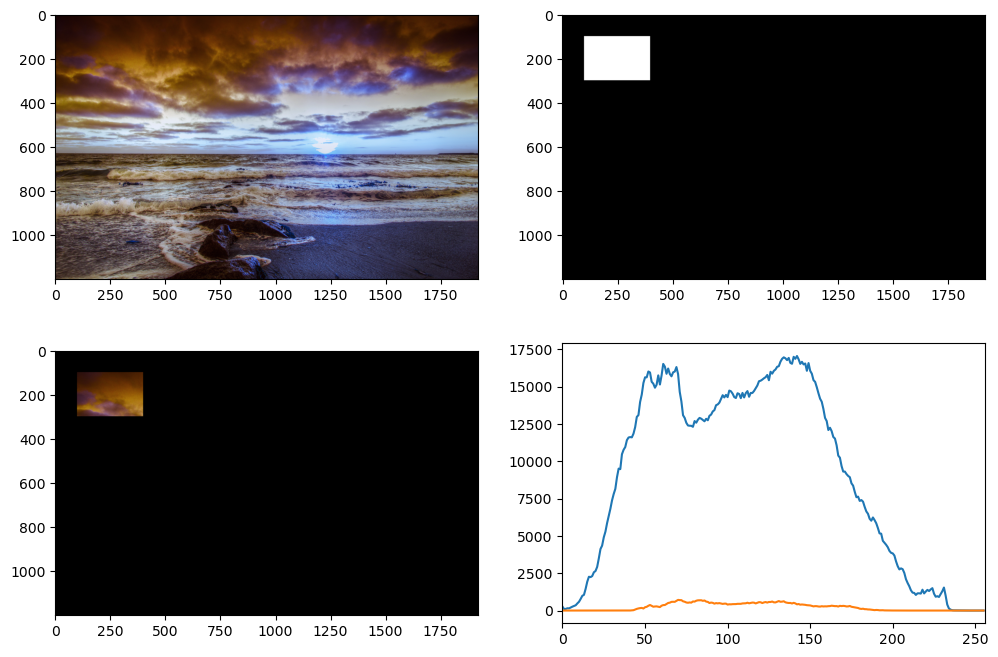

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sunset.jpg')
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


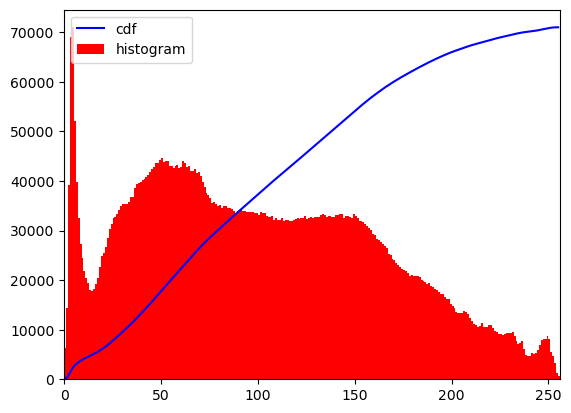

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sunset.jpg')
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


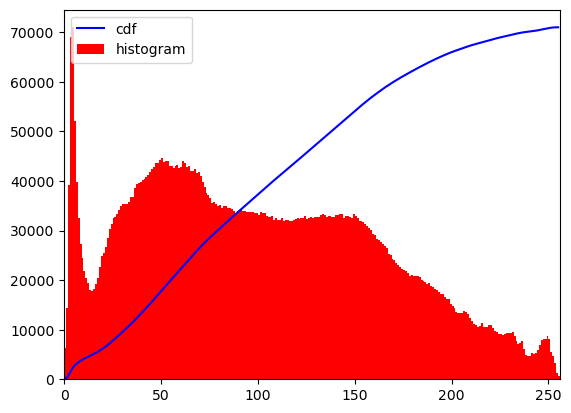

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sunset.jpg')
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


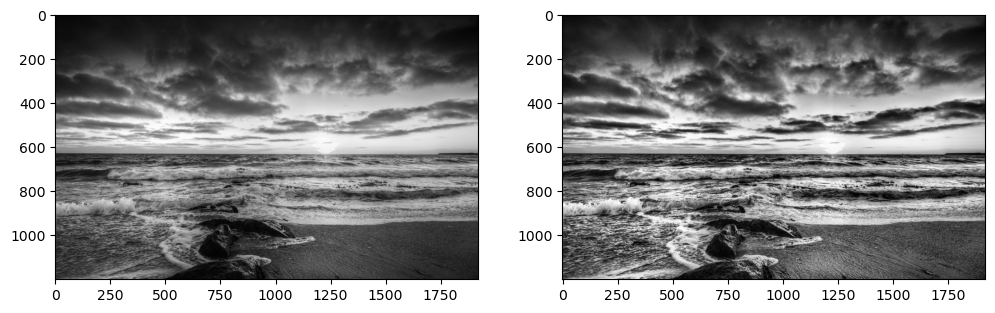

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sunset.jpg', 0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(cl1, 'gray')
plt.show()


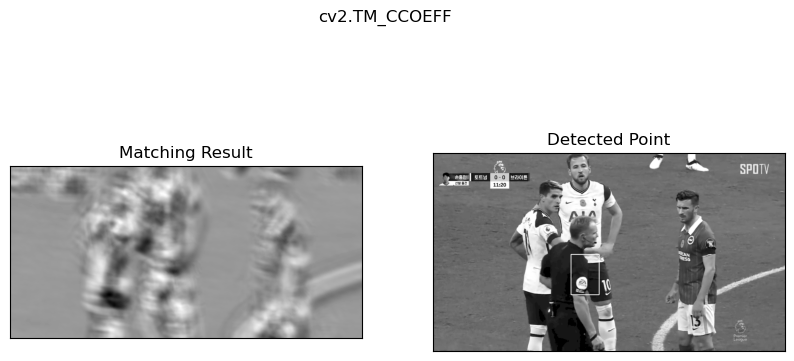

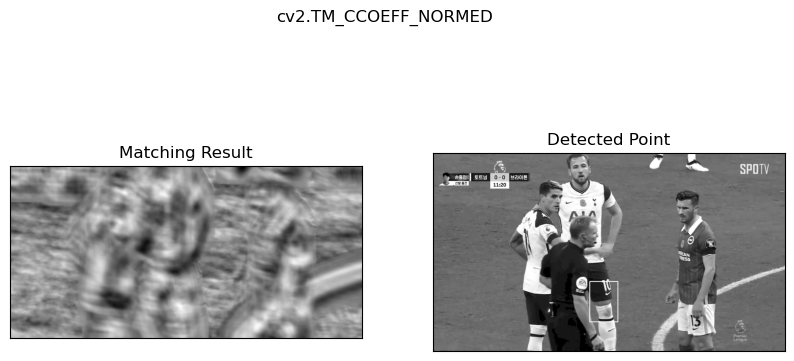

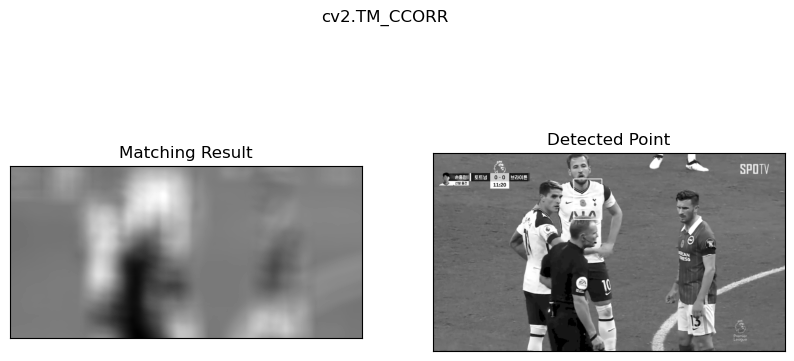

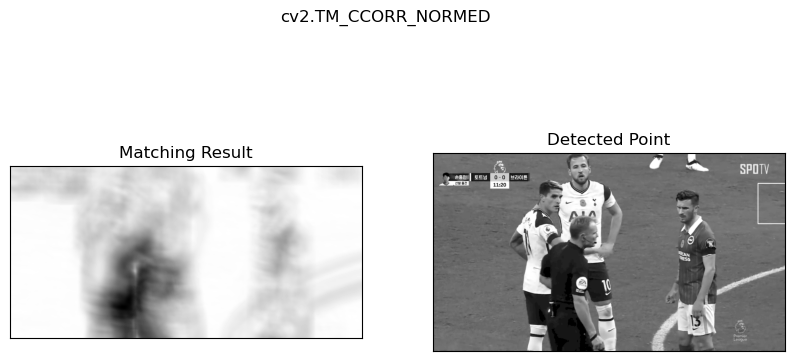

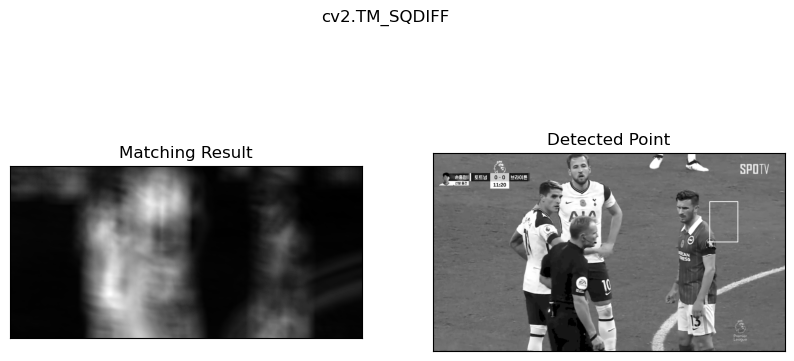

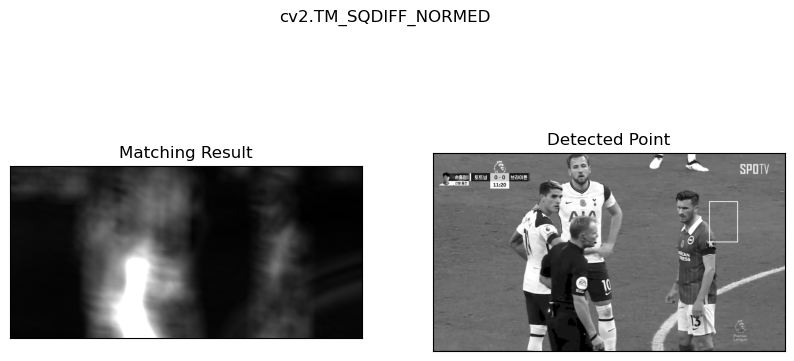

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('scpace2.png', 0) #mario
img2 = img.copy()
template = cv2.imread('scpace.png', 0) #coin
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
    'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(10,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()


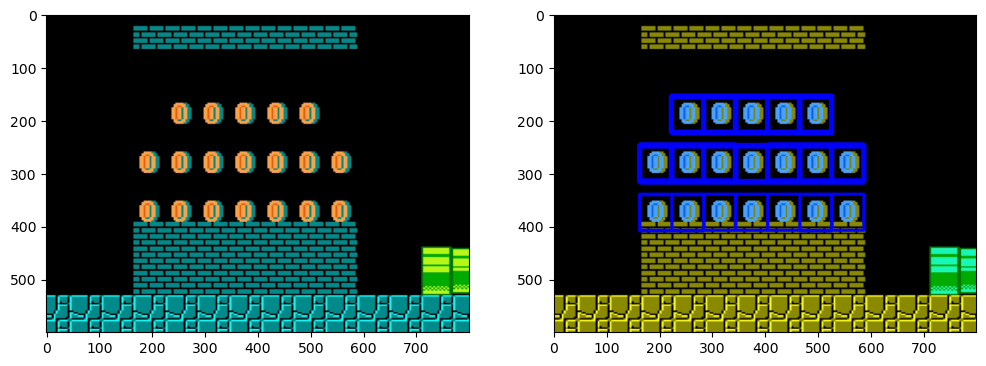

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('mario.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
cv2.cvtColor(img, cv2.COLOR_BGR2RGB, dst=img)

img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.png', 0)


w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
cv2.imwrite('res.png',img_rgb)
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(img_rgb, 'gray')
plt.show()